# Week 5 Hand-in

## Assignment

https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/05-Exercise.ipynb

## Status


# Imports

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

## Solution for ex 1

### A

In [58]:
api1 = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&CIVILSTAND=F&Tid=2008K1%2C2020K4"
skema1 = pd.read_csv(api1, sep=";")

In [62]:
fraskilt08 = skema1.INDHOLD.values[0]
fraskilt20 = skema1.INDHOLD.values[1]

print("Antallet af fraskilte i 2008: "+str(fraskilt08))
print("Antallet af fraskilte i 2008: "+str(fraskilt20))
print("% forskellen er: "+str(round(((fraskilt20-fraskilt08)/fraskilt08)*100,2))+"%")

Antallet af fraskilte i 2008: 428864
Antallet af fraskilte i 2008: 552419
% forskellen er: 28.81%


### B

In [36]:
ugift20 = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&OMR%C3%85DE=101%2C461%2C851%2C751%2C561&CIVILSTAND=U&Tid=2020K4"
skema_ugift20 = pd.read_csv(ugift20, sep=";")
tot20 = "https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&OMR%C3%85DE=101%2C461%2C851%2C751%2C561&Tid=2020K4&CIVILSTAND=TOT"
skema_tot20 = pd.read_csv(tot20, sep=";")

In [56]:
highest = 0
by = ""
for i in range(0,5):
    temp = (skema_ugift20.INDHOLD.values[i]/skema_tot20.INDHOLD.values[i])*100
    if temp > highest:
        highest = temp
        by = skema_ugift20.OMRÅDE.values[i]
        
print("Højeste % er: "+str(round(highest, 2))+"%")
print("Højeste % tilhører: "+by)

Højeste % er: 65.49%
Højeste % tilhører: 101 København


### C

In [96]:
gift08til20 = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&K%C3%98N=TOT&OMR%C3%85DE=101&Tid=*&CIVILSTAND=*'
skema_gift08til20 = pd.read_csv(gift08til20, sep=";")

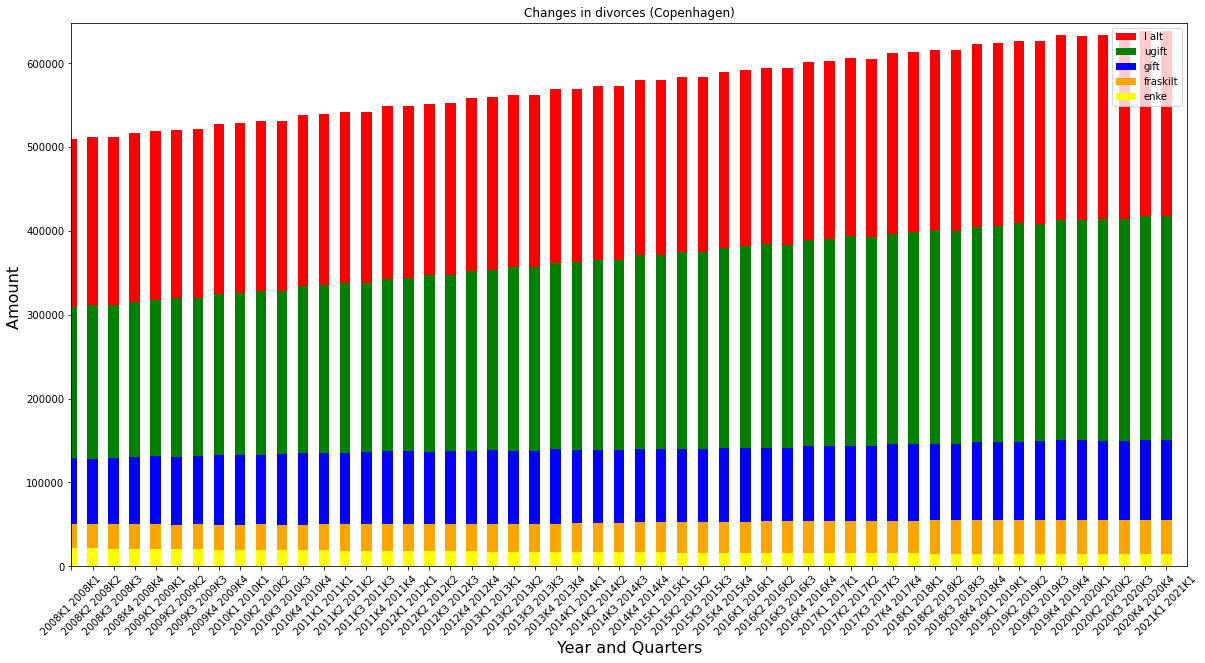

In [112]:
tid = sorted(list(set(skema_gift08til20.TID.values)))

ialt = skema_gift08til20.loc[skema_gift08til20['CIVILSTAND'] == 'TOT I alt']["INDHOLD"]
ugift = skema_gift08til20.loc[skema_gift08til20['CIVILSTAND'] == 'U Ugift']["INDHOLD"]
gift = skema_gift08til20.loc[skema_gift08til20['CIVILSTAND'] == 'G Gift/separeret']["INDHOLD"]
enke = skema_gift08til20.loc[skema_gift08til20['CIVILSTAND'] == 'E Enke/enkemand']["INDHOLD"]
fraskilt = skema_gift08til20.loc[skema_gift08til20['CIVILSTAND'] == 'F Fraskilt']["INDHOLD"]

plt.figure(figsize=(20,10))
plt.ticklabel_format(useOffset=False)

plt.axis([0, len(tid), 0, max(skema_gift08til20['INDHOLD']) + 10000])
plt.xticks(rotation=45)
plt.title('Changes in divorces (Copenhagen)', fontsize=12)
plt.xlabel('Year and Quarters', fontsize=16)
plt.ylabel('Amount ', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=10)

p1 = plt.bar(tid, ialt, width=0.5, linewidth=0, align='center', color='red')
p2 = plt.bar(tid, ugift, width=0.5, linewidth=0, align='center', color='green')
p3 = plt.bar(tid, gift, width=0.5, linewidth=0, align='center', color='blue')
p4 = plt.bar(tid, fraskilt, width=0.5, linewidth=0, align='center', color='orange')
p5 = plt.bar(tid, enke, width=0.5, linewidth=0, align='center', color='yellow')

plt.legend([p1,p2,p3,p4,p5],['I alt', 'ugift', 'gift','fraskilt', 'enke'], loc=1)

### D

In [113]:
giftugift = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=CodeAndValue&delimiter=Semicolon&CIVILSTAND=U%2CG&ALDER=*&Tid=2020K4'
skema_giftugift = pd.read_csv(giftugift, sep=";")

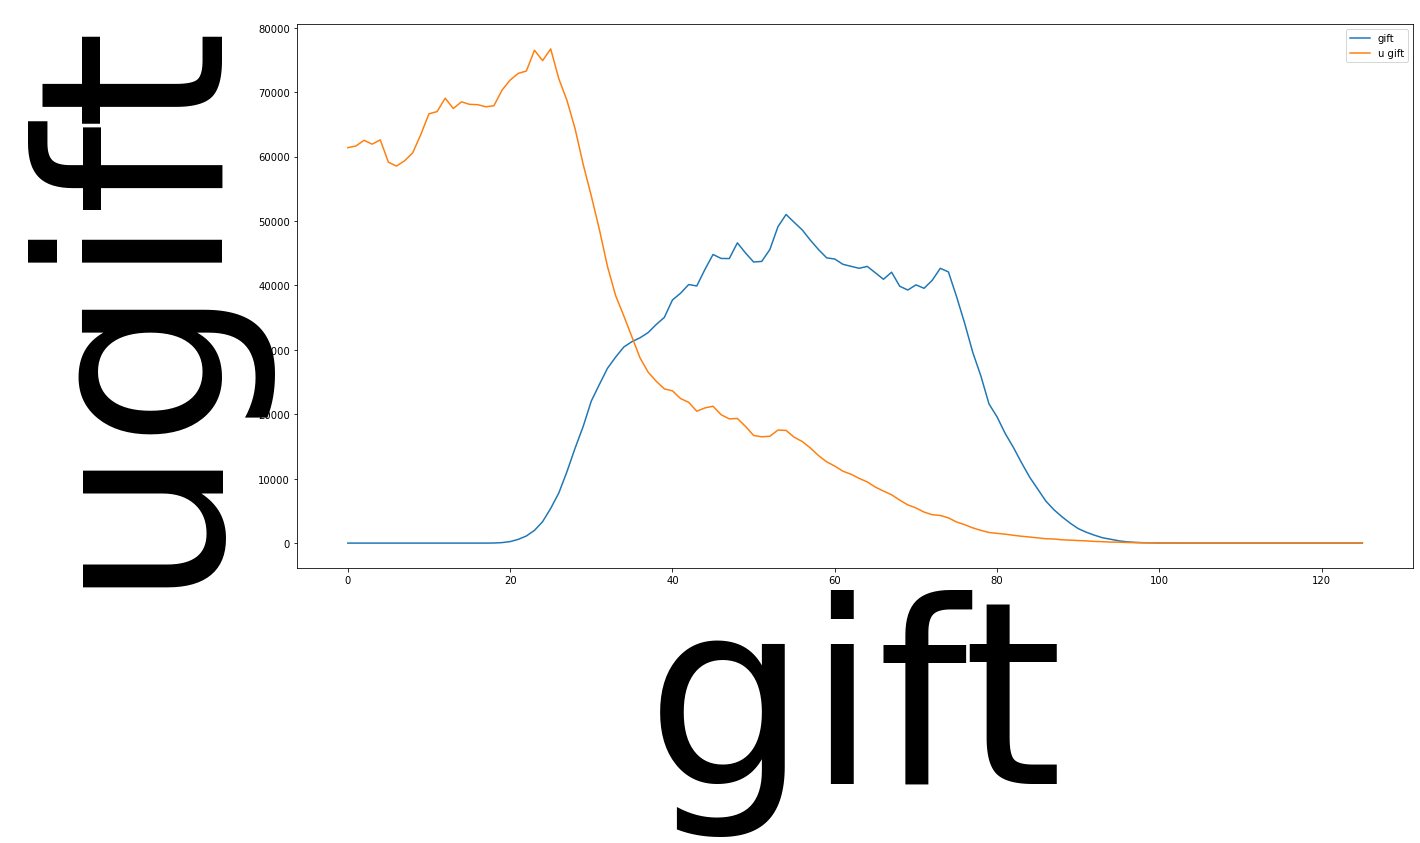

In [117]:
ages = list(range(0,126))
married = skema_giftugift.loc[skema_giftugift['CIVILSTAND'] == 'G Gift/separeret']["INDHOLD"][1:]
unmarried = skema_giftugift.loc[skema_giftugift['CIVILSTAND'] == 'U Ugift']["INDHOLD"][1:]

plt.figure(figsize=(20,10))

plt.plot(ages, married, label="gift")
plt.plot(ages, unmarried, label="u gift")

plt.xlabel("gift", fontsize=255)
plt.ylabel("ugift", fontsize=255)

plt.legend()